# 1. 代表ビーズモデルの計算

## ビーズモデル10個からDAMAVERを用いて平均像作成

`SHAPES`を実行するとビーズモデルの出力は素のビーズモデルと分子体積で整形したビーズモデルの2種類が生成される。ここでは原論文とは違い
ビーズモデル `*_beads_#.pdb` を元に代表ビーズモデルを計算する。

この計算には`DAMAVER` という`ATSAS`のプログラムがあるのでそれを使用する。

In [1]:
import tkinter
from tkinter import messagebox as tkMessageBox
from tkinter import filedialog as tkFileDialog
from tkinter import simpledialog as tkSimpleDialog
import os

In [ ]:
dir0=os.getcwd() 
root = tkinter.Tk()
root.withdraw()
infiles=tkFileDialog.askopenfilenames(title='Beads PDB files from shape',filetypes=[("ビーズファイル","*beads*.pdb")])
dir1=os.path.dirname(infiles[0]) 
os.chdir(dir1)
fns=""
for f in infiles:
    fns=fns+' '+os.path.basename(f)
cmd='damaver -a %s' %fns
print (cmd)
!damaver -a $fns

In [ ]:
damaver -a  6lyz_beads_1.pdb 6lyz_beads_2.pdb 6lyz_beads_3.pdb 6lyz_beads_4.pdb 6lyz_beads_5.pdb 6lyz_beads_5r.pdb 6lyz_beads_6.pdb 6lyz_beads_7.pdb 6lyz_beads_8.pdb 6lyz_beads_9.pdb 6lyz_beads_10.pdb
                :
           　途中　略
                :

 Wrote file ............................................. : 6lyz_beads_10r.pdb
 Read file .............................................. : 6lyz_beads_5.pdb
 Read file .............................................. : 6lyz_beads_5rr.pdb
 Read file .............................................. : 6lyz_beads_7r.pdb
 Read file .............................................. : 6lyz_beads_8r.pdb
 Read file .............................................. : 6lyz_beads_6r.pdb
 Read file .............................................. : 6lyz_beads_2r.pdb
 Read file .............................................. : 6lyz_beads_3r.pdb
 Read file .............................................. : 6lyz_beads_4r.pdb
 Read file .............................................. : 6lyz_beads_9r.pdb
 Read file .............................................. : 6lyz_beads_1r.pdb
 Read file .............................................. : 6lyz_beads_10r.pdb
 Wrote file ............................................. : damaver.pdb
 Number of atoms written ................................ : 1702
 Read file .............................................. : damaver.pdb
 Number of atoms ........................................ : 1702
 Number of phases ....................................... : 1
 Minimum number of contacts ............................. : 3
 Maximum number of contacts ............................. : 13
 Selected contact threshold ............................. : 5
 Atomic radius .......................................... : 1.750
 Excluded volume per atom ............................... : 30.34
 Maximum radius ......................................... : 29.80
 Average excluded volume ................................ : 0.0
 Selected cut-off volume ................................ : 2.5817E+04
 Final contact threshold ................................ : 5
 Final cut-off volume ................................... : 2.5817E+04
 Final number of atoms .................................. : 853
 Final volume ........................................... : 2.5877E+04
 Wrote file ............................................. : damfilt.pdb
 Read file .............................................. : damaver.pdb
 Number of atoms ........................................ : 1702
 Number of phases ....................................... : 1
 Minimum number of contacts ............................. : 3
 Maximum number of contacts ............................. : 13
 Selected contact threshold ............................. : 5
 Atomic radius .......................................... : 1.750
 Excluded volume per atom ............................... : 30.34
 Maximum radius ......................................... : 29.80
 Average excluded volume ................................ : 0.0
 Selected cut-off volume ................................ : 2.5817E+04
 Final contact threshold ................................ : 5
 Final cut-off volume ................................... : 2.5817E+04
 Final number of atoms .................................. : 853
 Final volume ........................................... : 2.5877E+04
 Wrote file ............................................. : damstart.pdb

`damaver`を実行すると

- `damaver.pdb`
- `damstart.pdb`
- `damfilt.pdb`

などのビーズモデルファイルが出力されるが、代表的なビーズモデルは`damfilt.pdb`である。

# 代表モデルから計算された散乱曲線、動径分布関数の検証
## `damfilt.pdb`から$I(q)$や$P(r)$を計算
ビーズモデルでは各試行計算の結果では非常によくモデルの$I(q)$や$P(r)$と入力値が一致するが、各試行回の結果を平均化して代表モデルを計算するとずれることが多い。

実は、元論文では記載されていないが、分子体積で整形されたビーズモデルで代表モデルを算出し、その`damfilt.pdb`から$I(q)$や$P(r)$を計算するとかなりずれてしまう。

筆者は念の為、**いつも代表モデルから計算された散乱曲線、動径分布関数の検証をするようにしている。**

`damfilt.pdb`から$I(q)$や$P(r)$を計算するために、以下のコード`damfilt_analysis`を用意した。

In [1]:
def damfilt_analysis(pdbfile_in,aList_r,aList_pr,aList_pr_model,inFile,prefix,aList_q,aList_i,aList_i_calc):
    
# written by Hinami Suzuki 
# This code reguires shapes_module.py
#

    import shapes_module as sm    

    
#damfilt.pdbのそれぞれのビーズの位置を取得
    aList_beads_x=[]
    aList_beads_y=[]
    aList_beads_z=[]
    
    sm.read_pdb(aList_beads_x,aList_beads_y,aList_beads_z,pdbfile_in)

#GNOM出力データからオリジナルのr,P(r),angstrom_scale,num_histを取得    
    #aList_r = []
    #aList_pr = []
    aList_pr_sd = []
    #aList_pr_model = []
    aList_pr_model_test = []
    aList_pr_model_test2 = []
    
    dmax,hist_grid,num_hist,angstrom_scale=sm.read_pr(aList_r,aList_pr,aList_pr_sd,aList_pr_model,aList_pr_model_test,aList_pr_model_test2,inFile)
    
#damfilt.pdbのビーズの位置とオリジナルのhist_gridからdamfilt.pdbのP(r)取得
    sm.calc_pr(aList_beads_x,aList_beads_y,aList_beads_z,aList_pr_model,hist_grid)

#オリジナルとdamfilt.pdbのP(r)のスケールを合わせる
    sm.scale_pr(aList_pr,aList_pr_sd,aList_pr_model)
    
#r,オリジナルのP(r),damfilt.pdbから計算されたP(r)をdatファイルに書き込む
    outfile_pr = prefix + 'damfilt_pr_calc_' + '.dat'
    
    sm.pr_writer(aList_pr,aList_r,aList_pr_model,outfile_pr)
    
    aString = 'Output p(r) file: ' + str(outfile_pr)
    print (aString)

#GNOM出力ファイルからオリジナルのq,I(q)を取得
    aList_i_sd=[]
    aList_i_reg=[]
    sm.read_i(aList_q,aList_i,aList_i_sd,aList_i_reg,inFile,angstrom_scale)
    
#damfilt.pdbの計算されたP(r)からdamfilt.pdbのI(q)を計算
    nbeads=len(aList_beads_x)
    sm.ft_to_intensity(aList_q,aList_i_calc,aList_r,aList_pr_model,nbeads)
    
    (chi_sq,rvalue) = sm.score_Ic(aList_q,aList_i,aList_i_sd,aList_i_calc)
    
#オリジナルとdamfilt.pdbのI(q)のスケールを合わせる
    aString = 'Rvalue: ' + str('%4.3f'%(rvalue)) + ' CHI-squared: ' + str('%4.3f'%(chi_sq))
    print (aString)
            
#q,オリジナルのI(q),damfilt.pdbから計算されたI(q)をdatファイルに書き込む
    file_intensity = prefix + 'damfilt_i_calc_' + '.dat'        
    sm.write_all_data(file_intensity,aList_q,aList_i,aList_i_calc,aString)

    aString = 'Output intensity file: ' + str(file_intensity)
    print (aString)
            
    return;


以下で実際に上の関数を用いて計算を行う。

- 入力：ビーズモデルの代表(PDBファイル)、元のGNOM出力ファイル
- 出力：`damfilt_pr_calc_.dat`、`damfilt_i_calc_.dat`

In [2]:
%matplotlib inline
import tkinter,os
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import messagebox as tkMessageBox
from tkinter import filedialog as tkFileDialog
from tkinter import simpledialog as tkSimpleDialog

root=tkinter.Tk()
root.withdraw()

#入出力の配列などは準備しておく
prefix=''
aList_r = []
aList_pr = []
aList_pr_model=[]
aList_q=[]
aList_i=[]
aList_i_calc=[]
#
#ファイルの読み込み
pdbfile_in=tkFileDialog.askopenfilename(title='Open damfilt file',filetypes=[("pdbファイル","*damfilt.pdb")])
inFile=tkFileDialog.askopenfilename(title='Open gnom file',filetypes=[("アウトファイル","*.out")])
print('Input pdb file:',os.path.basename(pdbfile_in))
print('Original gnom file:',os.path.basename(inFile))
damfilt_analysis(pdbfile_in,aList_r,aList_pr,aList_pr_model,inFile,prefix,aList_q,aList_i,aList_i_calc)

Input pdb file: damfilt.pdb
Original gnom file: 6lyz.out
Output p(r) file: damfilt_pr_calc_.dat
Rvalue: 0.018 CHI-squared: 33.905
Output intensity file: damfilt_i_calc_.dat


ファイルから直接プロットしてもよいのだが`Pandas`のDataframeの形に変換しておく。

In [3]:
df = pd.DataFrame({'r': aList_r,'P(r)_original': aList_pr,'P(r)_beadsmodel':aList_pr_model})
df.head()

r  P(r)_original  P(r)_beadsmodel
0  0.0000       0.000000              0.0
1  0.4464     121.766009              0.0
2  0.8929     244.444123              0.0
3  1.3390     368.642411              0.0
4  1.7860     495.044954              0.0

In [4]:
df2 = pd.DataFrame({'q': aList_q, 'I(q)_original': aList_i,'I(q)_beadsmodel':aList_i_calc})
df2.head()

q  I(q)_original  I(q)_beadsmodel
0  0.0025        268.083       265.125140
1  0.0050        267.688       264.760052
2  0.0075        267.032       264.152562
3  0.0100        266.115       263.304156
4  0.0125        264.940       262.216902

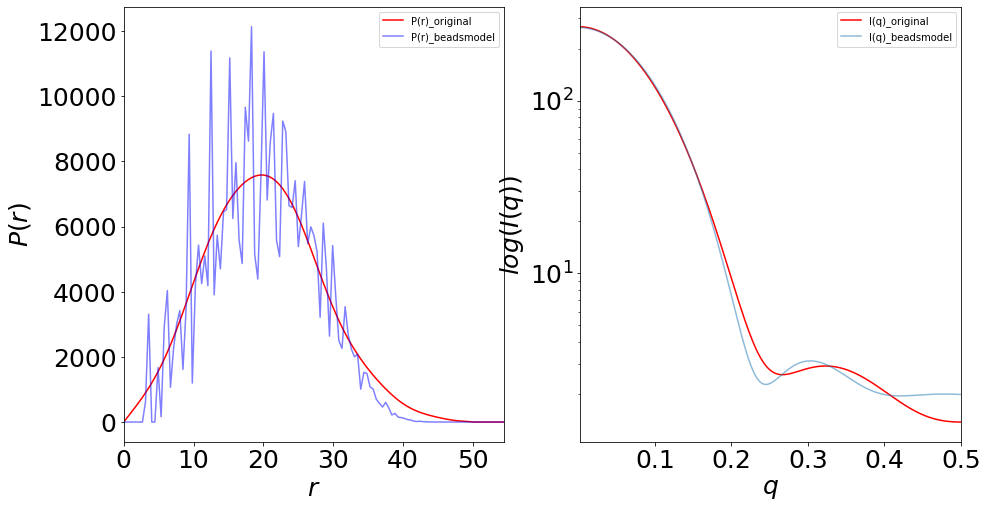

In [5]:
fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
df.plot(ax=ax1,x='r',y='P(r)_original',color='red',label='P(r)_original',fontsize=25)
df.plot(ax=ax1,x='r',y='P(r)_beadsmodel',color='blue',alpha=0.5,label='P(r)_beadsmodel',fontsize=25)
ax1.set_xlabel('$r$',fontsize=25)
ax1.set_ylabel('$P(r)$',fontsize=25)

ax2 = fig.add_subplot(122)
df2.plot(ax=ax2,x='q',y='I(q)_original',color='red',label='I(q)_original',fontsize=25,logy=True)
df2.plot(ax=ax2,x='q',y='I(q)_beadsmodel',alpha=0.5,label='I(q)_beadsmodel',fontsize=25,logy=True)
ax2.set_xlabel('$q$',fontsize=25)
ax2.set_ylabel('$log(I(q))$',fontsize=25)

#fig.savefig('damfilt.png')